In [1]:
import scipy
import numpy as np
import pandas as pd
from learner import learner
from hw2_resources.plotBoundary import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[2,2],[2,3],[0,-1], [-3, -2]])
Y = np.array([1, 1, -1, -1]).reshape((4,1))

svm = learner()
svm.set_data(X,Y)

In [3]:
def data_path(i, type):
    return 'hw2_resources/data/data' + str(i) + '_' + type + '.csv'

def plot_data(i, X, Y, values, ax, title = None, kind = 'kernel'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = max((x_max-x_min)/20., (y_max-y_min)/20.)
    xx, yy = meshgrid(arange(x_min, x_max, h),
                      arange(y_min, y_max, h))
    zz = array([svm.predict(x, kind) for x in c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)

    CS = ax.contour(xx, yy, zz, values, colors = 'orange', linestyles = 'dashed', linewidths = 2)
    ax.clabel(CS, fontsize=9, inline=1)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = pl.cm.cool)
    ax.set_title(title)
#     ax.axis('tight')

def read_data(path):
    data = pd.read_table(path, sep = ' ', header = None)
    X = np.array(data[[0,1]])
    Y = np.array(data[[2]])
    return((X,Y))

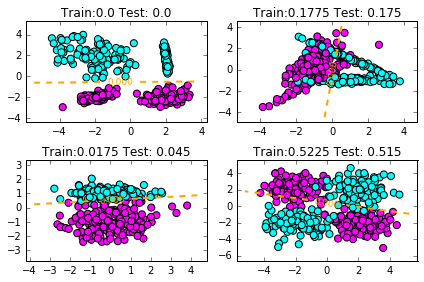

In [4]:
fig = plt.figure()
for i in [1, 2, 3, 4]:

    X,Y = read_data(data_path(i, 'train'))

    svm = learner()
    svm.set_data(X,Y)

    svm.train_pegasos_linear(1,1)
    
    X_val, Y_val = read_data(data_path(i, 'validate'))
    
    training_error = svm.training_error(kind = 'pegasos')
    validation_error = svm.test_error(X_val, Y_val,kind = 'pegasos')
    
#     training_error = 0
#     validation_error = 0

    ax = fig.add_subplot(2,2,i)
    plot_data(i, 
              X, 
              Y, 
              (0), 
              ax, 
              'Train:' + str(training_error) + ' Test: ' + str(validation_error),
             kind = 'pegasos')
plt.tight_layout()

In [5]:
# kernels we're using
def gaussian_kernel(x, y, s = 1):
    return scipy.exp(-(np.linalg.norm(x - y))**2 / (s**2))

def linear_kernel(x,y):
    return np.dot(x,y)

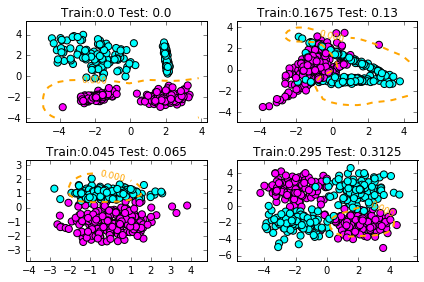

In [6]:
fig = plt.figure()
gamma = 1
max_epochs = 10

for i in [1, 2, 3, 4]:

    X,Y = read_data(data_path(i, 'train'))

    svm = learner()
    svm.set_data(X,Y)
    svm.set_kernel_function(gaussian_kernel)
    svm.make_kernel_matrix()
    svm.train_pegasos_kernelized(gamma, max_epochs)
    
    X_val, Y_val = read_data(data_path(i, 'validate'))
    
    training_error = svm.training_error('kernel')
    validation_error = svm.test_error(X_val, Y_val, 'kernel')
    
    ax = fig.add_subplot(2,2,i)
    plot_data(i, 
              X, 
              Y, 
              (0), 
              ax, 
              'Train:' + str(training_error) + ' Test: ' + str(validation_error), 
              'kernel')
plt.tight_layout()